# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
df = dataframe
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
descr = df.describe()
descr

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [6]:
def q1():
    q_norm = df['normal'].quantile((0.25,0.5,0.75))
    q_binom = df['binomial'].quantile([0.25,0.5,0.75])
    q_diff = q_norm - q_binom
    return tuple(round(q_diff, 3))

In [7]:
## Outra maneira, bem menos elegante...
# descr = df.describe() 
# q1_norm = descr.loc['25%']['normal']
# q2_norm = descr.loc['50%']['normal']
# q3_norm = descr.loc['75%']['normal']
# q1_binom = descr.loc['25%']['binomial']
# q2_binom = descr.loc['50%']['binomial']
# q3_binom = descr.loc['75%']['binomial']
# return ( round(q1_norm - q1_binom, 3), round(q2_norm - q2_binom, 3), round(q3_norm - q3_binom, 3) )

In [8]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

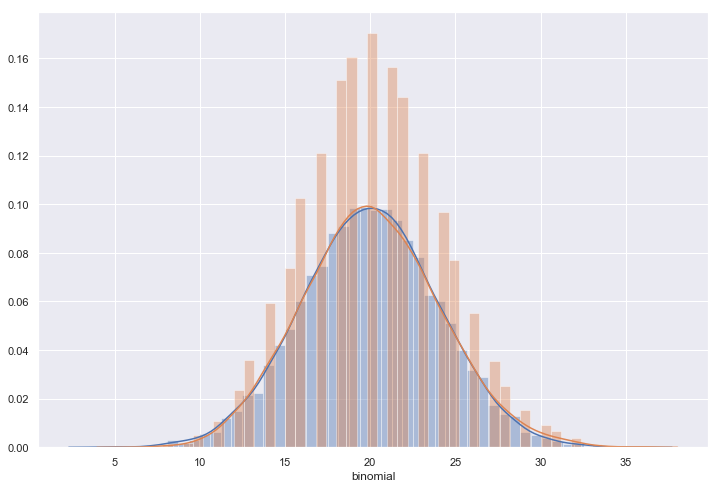

In [19]:
# Nao esperava,
# mas acredito que seja pelo fato da distribuicoes nao serem tao distintas, vide histogramas abaixo
sns.distplot(df['normal']);
sns.distplot(df['binomial']);

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [10]:
def q2():
    media = df['normal'].mean()
    desvio = df['normal'].std()
    ecdf = ECDF(df['normal'])
    prob = ecdf(media + desvio) - ecdf(media - desvio)
    return float(prob.round(3))

In [11]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [12]:
def q3():
    m_norm = df['normal'].mean()
    v_norm = np.var(df['normal'])
    m_binom = df['binomial'].mean()
    v_binom = np.var(df['binomial'])
    return ( round(m_binom - m_norm, 3), round(v_binom - v_norm, 3) )

In [13]:
q3()

(0.106, 0.22)

In [14]:
# Interessante ver que o calculo de variancia padrao do Python e o do Numpy, possuem diferenca, que perde no arredondamento
m_norm = df['normal'].mean()
v_norm = df['normal'].var()
m_binom = df['binomial'].mean()
v_binom = df['binomial'].var()
diff = ( m_binom - m_norm, v_binom - v_norm )
print(diff)

m_norm = df['normal'].mean()
v_norm = np.var(df['normal'])
m_binom = df['binomial'].mean()
v_binom = np.var(df['binomial'])
diff = ( m_binom - m_norm, v_binom - v_norm )
print(diff)

(0.10554393347370805, 0.2202361370433188)
(0.10554393347370805, 0.22021411342961628)


Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [15]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [30]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [22]:
stars.shape

(17897, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [55]:
mprof = stars.query('target == 0')['mean_profile']
false_pulsar_mean_profile_standardized = (mprof - mprof.mean()) / mprof.std()

In [62]:
def q4():
    qtst = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return tuple(ecdf(qtst).round(3))

In [63]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

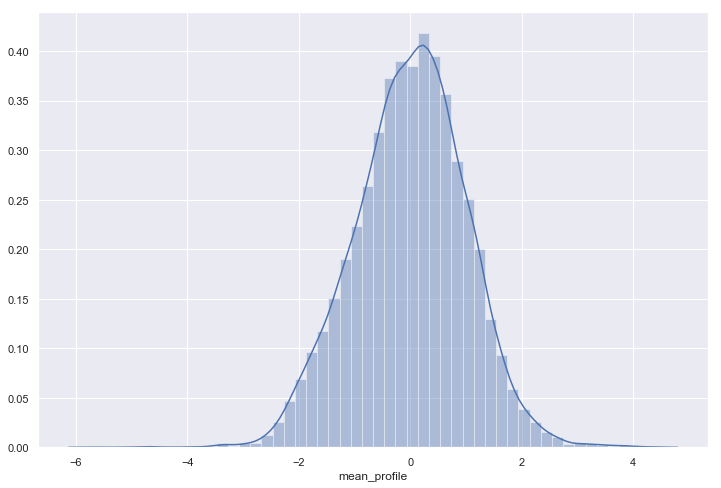

In [61]:
sns.distplot(false_pulsar_mean_profile_standardized);

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [67]:
def q5():
    qts = false_pulsar_mean_profile_standardized.quantile((0.25, 0.5, 0.75))
    qtst = sct.norm.ppf([0.25, 0.5, 0.75], 0, 1)
    return tuple((qts - qtst).round(3))

In [68]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.